In [2]:
# %matplotlib_svg
%pylab inline
# import numpy as np
# from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "simsun" # 可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了
plt.rcParams['axes.unicode_minus']=False    # 當座標軸上的 負號無法正常顯示時，需加這行 code

## 繪圖函數簡介

介紹如何使用 matplotlib 繪製一些常用的圖表。matplotlib 的每個繪圖函數都有許多關鍵字參數用來設定圖表的各種屬性，由於篇幅有限，本書不能對其一一介紹。

一般來說，如果需要對圖表進行某種特殊的設定，可以在繪圖函數的說明文件或 matplotlib 的示範頁面中找到相關的說明。

### 對數座標圖

前面介紹過如何使用 `plot()` 繪製曲線圖，所繪製圖表的 X-Y 軸座標都是算術座標。下面看看如何在對數座標系中繪圖。

繪製對數座標圖的函數有三個：`semilogx()`, `semilogy()`, `loglog()` 。它們分別繪製 X 軸為對數座標、Y 軸為對數座標以及兩個軸都為對數座標的圖表。

下面的程式使用 4 種不同的座標系繪製低通濾波器的頻率回應曲線，結果如圖4-24所示。其中，左上圖為 `plot()` 繪製的算術座標系，右上圖為 `semilogx()` 繪製的 X 軸對數座標系，左下圖為 `semilogy()` 繪製的 Y 軸對數座標系，右下圖為 `loglog()` 繪製的雙對數座標系。使用雙對數座標系表示的頻率回應曲線通常被稱為波特圖。

<ipython-input-5-716f16701726>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 1.5)
<ipython-input-5-716f16701726>:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 1.5)
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Substituting symbol - from STIXGeneral
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Substituting symbol - from STIXGeneral
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Substituting symbol - from STIXGeneral
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Substituting symbol - from STIXGeneral
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Substituting symbol - from STIXGeneral
Font 'default' does not have a

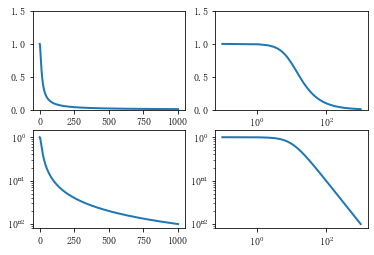

In [5]:
#%fig=低通濾波器的頻率響應：算術座標（左上）、X軸對數座標（右上）、Y軸對數座標（左下）、雙對數座標（右上） 
w = np.linspace(0.1, 1000, 1000)
p = np.abs(1/(1+0.1j*w)) # 計算低通濾波器的頻率響應

fig, axes = plt.subplots(2, 2)

functions = ("plot", "semilogx", "semilogy", "loglog")

for ax, fname in zip(axes.ravel(), functions):
    func = getattr(ax, fname)
    func(w, p, linewidth=2)
    ax.set_ylim(0, 1.5)

### 極座標圖

極座標系是笛卡爾座標系完全不同的座標系，極座標系中的點由一個夾角和一段相對中心點的距離表示。下面的程式繪製極座標圖，效果如圖4-25所示。

(<a list of 4 Line2D ticklines objects>, [Text(0, 0, ''), Text(0, 0, '')])

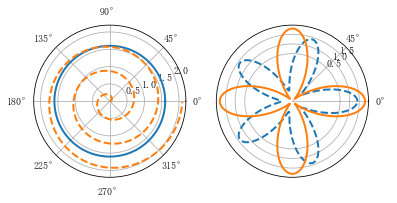

In [6]:
#%fig=極座標中的圓、螺旋線和玫瑰線
theta = np.arange(0, 2*np.pi, 0.02)

plt.subplot(121, polar=True) #❶
plt.plot(theta, 1.6*np.ones_like(theta), linewidth=2) #❷
plt.plot(3*theta, theta/3, "--", linewidth=2)

plt.subplot(122, polar=True)
plt.plot(theta, 1.4*np.cos(5*theta), "--", linewidth=2)
plt.plot(theta, 1.8*np.cos(4*theta), linewidth=2)
plt.rgrids(np.arange(0.5, 2, 0.5), angle=45) #❸
plt.thetagrids([0, 45]) #❹;

- ❶ 呼叫 `subplot()` 建立子圖時透過設定 `polar` 參數為 `True`，建立一個極座標子圖。
- ❷ 然後呼叫 `plot()` 在極座標子圖中繪圖。也可以使用 `polar()` 直接建立極座標子圖並在其中繪製曲線。
- ❸ `rgrids()` 設定同心圓光柵的半徑大小和文字標記的角度。因此右圖中的虛線圓圈有三個，半徑分別為 0.5, 1.0, 1.5，這些文字沿著 45度 線排列。
- ❹ `thetagrids()` 設定放射線光柵的角度，因此右圖中只有兩條放射線光柵線，角度分別為 0 度 和 45 度。

### 柱狀圖

柱狀圖用其每根柱子的長度表示值的大小，它們通常用來比較兩組或多組值。下面的程式從檔案中讀取中國人口的年齡的分佈資料(人口分佈資料由維基百科提供，僅供參考，不保證正確性)，並使用柱狀圖比較男性和女性的年齡分佈，效果如圖4-26所示。

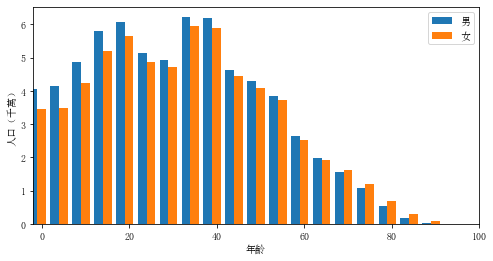

In [7]:
#%fig=中國男女人口的年齡分佈圖
data = np.loadtxt("china_population.txt")
width = (data[1,0] - data[0,0])*0.4 #❶
plt.figure(figsize=(8, 4))
# c1, c2 = plt.rcParams['axes.color_cycle'][:2]
c1, c2 = plt.rcParams['axes.prop_cycle'][:2]
plt.bar(data[:,0]-width, data[:,1]/1e7, width, color=c1['color'], label=u"男") #❷
plt.bar(data[:,0], data[:,2]/1e7, width, color=c2['color'], label=u"女") #❸
plt.xlim(-width, 100)
plt.xlabel(u"年齡")
plt.ylabel(u"人口（千萬）")
plt.legend();

讀取的資料中，第一列為年齡，它將作為柱狀圖的水平座標。
- ❶ 首先計算柱狀圖中每根柱子的寬度，因為要在每個年齡段上繪製兩根柱子，因此柱子的寬度應該小於年齡段的二分之一。這裡以年齡段的 0.4 倍作為柱子的寬度。
- ❷ 呼叫 `bar()` 繪製男性人口分佈的柱狀圖。它的第一個參數為每根柱子的左邊緣的水平座標，為了讓男性和女性的柱子以年齡刻度為中心，這裡讓每根柱子左側的水平座標為「年齡減去柱子的寬度」。`bar()` 的第二個參數為每根柱子的高度，第三個參數指定所有柱子的寬度。當第三個參數為序列時，可以為每根柱子指定寬度。
- ❸ 繪製女性人口分佈的柱狀圖，這裡以年齡為柱子的左邊緣水平座標，因此女性和男性的人口分佈圖以年齡刻度為中心。由於 `bar()` 不自動修改顏色，因此程式中透過 `color` 參數設定兩個柱狀圖的顏色。

### 雜湊圖

使用 `plot()` 繪圖時，如果指定樣式參數為只繪製資料點，那麼所繪製的就是一幅雜湊圖。例如：
```
plt.plot(np.random.random(100), np.random.random(100), "o")
```
但是這種方法所繪製的點無法單獨指定顏色和大小。`scatter()` 所繪製的雜湊圖可以指定每個點的顏色和大小。下面的程式示範了 `scatter()` 的用法，效果如圖4-27所示。

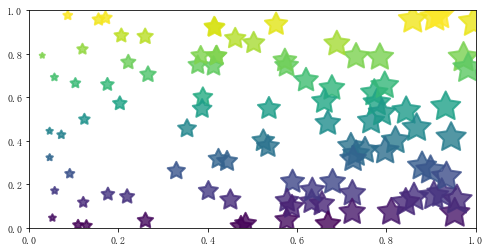

In [8]:
#%fig=可指定點的彩色和大小的雜湊
plt.figure(figsize=(8, 4))
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y, s=x*1000, c=y, marker=(5, 1), 
            alpha=0.8, lw=2, facecolors="none")
plt.xlim(0, 1)
plt.ylim(0, 1);

`scatter()` 的前兩個參數是兩個陣列，分別指定每個點的 X 軸和 Y 軸的座標。`s` 參數指定點的大小，其值和點的面積成正比，可以是單一數值或陣列。

`c`參數指定每個點的顏色，也可以是數值或陣列。這裡使用一維陣列為每個點指定了一個數值。透過顏色對映表，每個數值都會與一個顏色相對應。預設的顏色對映表中藍色與最小值對應，紅色與最大值對應。當 `c` 參數是形狀為`(N, 3)` 或 `(N, 4)` 的二維陣列時，則直接表示每個點的 RGB 顏色。

`marker` 參數設定點的形狀，可以是一個表示形狀的字串，或是表示多邊形的兩個元素的元組，第一個元素表示多邊形的邊數，第二個元素表示多邊形的樣示，設定值範圍為 0, 1, 2, 3。0 表示多邊形，1 表示星形，2 表示放射形，3 表示忽略邊數顯示為圓形。

最後，透過 `alpha` 參數設定點的透明度， `lw` 參數設定線寬，它是 `linewidth` 的縮寫，`facecolors` 參數為 "none" 表示雜湊點沒有填充色。 

### 影像

`imread()` 和 `imshow()` 提供了簡單的影像載入和顯示功能。`imread()` 可以從影像檔讀取資料，獲得一個表示影像的 Numpy 陣列。它的第一個參數是檔案名稱或檔案物件，`format` 參數指定影像類型，如果省略則由檔案的副檔名決定影像類型。對於灰階影像，它傳回一個形狀為 `(M, N)` 的陣列；對於彩色影像，它傳回形狀為 `(M, N, C)` 的陣列。其中 `M` 為影像的高度，`N` 為影像的寬度，`C` 為 3 或 4，表示影像的通道數。下面的程式從 lena.jpg 中讀取圖像資料，效果如圖 4-28 所示。所得到的陣列 `img` 是一個形狀為 `(393, 512, 3)` 的單字節不帶正負號的整數陣列。這是因為通常所使用的影像採用單字節分別儲存每個像素的紅、綠、藍三個通道的分量：

In [9]:
img = plt.imread("lena.jpg")
print(img.shape, img.dtype)

(393, 512, 3) uint8


下面使用 `imshow()` 顯示 `img` 所表示的影像：
- ❶ `imshow()` 可以用來顯示 `imshow()` 所傳回的陣列。如果陣列是表示多通道影像的 3D 陣列，則每個像素的顏色由各個通道的值決定。
- ❷ `imshow()` 所繪製圖表的 Y 軸的正方向是從上往下的。如果設定 `imshow()` 的 `origin` 參數為 "lower"，則所顯示圖表的原點在左下角，但是整個影像就上下顛倒了。
- ❸ 如果 3D 陣列的元素類型為浮點數，則元素值範圍為 0.0 到 1.0，與顏色值 0 到 255 對應。超過這個範圍可能會出現顏色異常的像素。下面的實例將陣列 `img` 轉為浮點陣列並用 `imshow()` 進行顯示，由於數值範圍超過了 0.0~1.0 ，因此顏色顯示異常。
- ❹ 而設定值在 0.0~1.0 的浮點陣列和原始影像完全相同。
- ❺ 使用 `clip()` 將超出範圍的值限制在設定值範圍之內，可以使整個影像變亮。
- ❻ 如果 `imshow()` 的參數是二維陣列，則使用顏色對映表決定每個像素的顏色。這裡顯示影像中的紅色通道，它是一個二維陣列。其顯示效果比較嚇人，因為預設的影像對應將最小值對映為藍色、將最大值對映為紅色。可以使用 `colorbar()` 將顏色對映表在圖表中顯示出來。
- ❼ 透過 `imshow()` 的 `cmap` 參數可以修改顯示影像時所採用的顏色對映表，使用名為 `copper` 的顏色對映表顯示影像的紅色通道。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


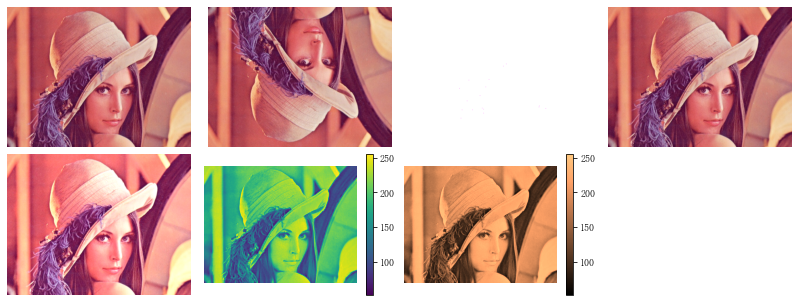

In [10]:
#%fig=用imread()和imshow()顯示圖形
img = plt.imread("lena.jpg")
fig, axes = plt.subplots(2, 4, figsize=(11, 4))
fig.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)

axes = axes.ravel()

axes[0].imshow(img)                        #❶
axes[1].imshow(img, origin="lower")        #❷
axes[2].imshow(img * 1.0)                  #❸
axes[3].imshow(img / 255.0)                #❹
axes[4].imshow(np.clip(img / 200.0, 0, 1)) #❺

axe_img = axes[5].imshow(img[:, :, 0])     #❻
plt.colorbar(axe_img, ax=axes[5])

axe_img = axes[6].imshow(img[:, :, 0], cmap="copper") #❼
plt.colorbar(axe_img, ax=axes[6])

for ax in axes:
    ax.set_axis_off()

顏色對映表是一個 `ColorMap` 物件，matplotlib 中己經預先定義了很多顏色對映表，可以透過下面的敘述找到這些顏色對映表的名字：

In [11]:
import matplotlib.cm as cm
sorted(cm.cmap_d.keys())[:5] 

D:\Program_File\VSCode_Portable\python-3.8.3.amd64\lib\_collections_abc.py:702: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  return len(self._mapping)
D:\Program_File\VSCode_Portable\python-3.8.3.amd64\lib\_collections_abc.py:720: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  yield from self._mapping


['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG']

使用 `imshow()` 可以顯示任意的二維資料，例如下面的程式使用影像直觀地顯示了二元函數 $f(x,y)=xe^{x^2-y^2}$ ，效果如圖4-29所示。

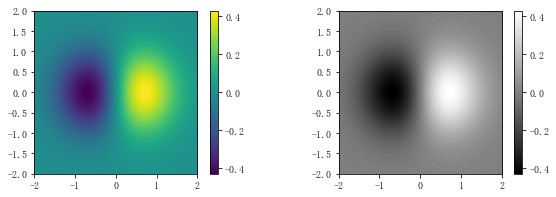

In [12]:
#%fig=使用imshow()可視化二元函數
y, x = np.ogrid[-2:2:200j, -2:2:200j]
z = x * np.exp( - x**2 - y**2) #❶

extent = [np.min(x), np.max(x), np.min(y), np.max(y)] #❷

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(z, extent=extent, origin="lower") #❷
plt.colorbar()
plt.subplot(122)
plt.imshow(z, extent=extent, cmap=cm.gray, origin="lower")
plt.colorbar();

- ❶ 首先透過陣列的廣播功能計算出表示函數值的二維陣列 z，注意它的第 0 軸表示 Y 軸、第 1 軸表示 X 軸。
- ❷ 然後將 X、Y 軸的設定值範圍儲存到 `extent` 列表中。
- ❸ 將 `extent` 列表傳遞給 `imshow()` 的 `extent` 參數，這樣圖表的 X、Y 軸的刻度標籤將使用 `extent` 列表指定的範圍。

### 相等線圖

還可以使用相等線圖表示二元函數。所謂相等線，是指由函數值相等的各點連成的平順曲線。相等線可以直觀地表示二元函數值的變化趨勢，例如相等線密集的地方表示函數值在此處的變化較大。matplotlib 中可以使用 `contour()` 和 `contourf()` 描繪相等線，它們的區別是 `contourf()` 所得到的是帶填充效果的相等線。下面的程式示範了這兩個函數的用法，效果如圖 4-30 所示：

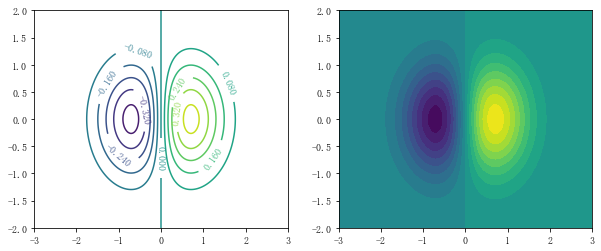

In [13]:
#%fig=用contour(左)和contourf(右)描繪相等線圖
y, x = np.ogrid[-2:2:200j, -3:3:300j] #❶
z = x * np.exp( - x**2 - y**2) 

extent = [np.min(x), np.max(x), np.min(y), np.max(y)]

plt.figure(figsize=(10,4))
plt.subplot(121)
cs = plt.contour(z, 10, extent=extent) #❷
plt.clabel(cs) #❸
plt.subplot(122)
plt.contourf(x.reshape(-1), y.reshape(-1), z, 20) #❹;

- ❶ 為了更清楚地區分 X 軸和 Y 軸，這裡讓它們的設定值範圍和等距次數均不相同。這樣所得到的陣列 z 的形狀為 `(200,300)` ，它的第 0 軸對應 Y 軸，第 1 軸對應 X 軸。
- ❷ 呼叫 `contour()` 繪製陣列 z 的相等線圖，第二個參數為 10 表示將整個函數的設定值範圍等距為 10 個區間，即其所謂的相等線圖中將有 9 條相等線。和 `imshow()` 一樣，可以使用 `extent` 參數指定相等線圖的 X 軸和 Y 軸的資料範圍。
- ❸ `contour()` 所傳回的是一個 `QuadContourSet`物件，將它傳遞給 `clabel()` ，為其中的相等線標上對應的值。
- ❹ 呼叫 `contourf()` 繪製帶填充效果的相等線圖。這裡示範了另一種設定 X、Y 軸設定值範圍的方法。它的前兩個參數分別是計算陣列 z 時所使用的 X 軸和 Y 軸上的取樣點，這兩個陣列必須是一維陣列或是形狀與陣列 z 相同的陣列。

In [14]:
z.shape, x.shape

((200, 300), (1, 300))

> **TIP**

> 若果需要對雜湊點資料繪制相等線圖，可以先使用`scipy.interpolate`模組中提供的插值函數將雜湊點資料插值為網格資料。

還可以使用相等線繪製隱函數曲線。所謂隱函數，是指在一個方程式中，若令 x 在某一區間內取任意值時總有對應的 y 滿足此方程式，則可以說方程式在該區間上確定了 x 的隱函數 y ，如隱函數 $x^2+y^2-1=0$ 表示一個單位圓。

顯然無法像繪製一般函數那樣，先建立一個等差陣列表示變數 x 的設定值點，然後計算出陣列中每個 x 所對應的 y 值。可以使用相等線解決這個問題，顯然隱函數的曲線就是值等於 0 的那條相等線。下面的程式繪製函數：

$f(x, y)=(x^2+y^2)^4-(x^2-y^2)^2$

在 $f(x, y)=0$ 和 $f(x, y)-0.1=0$ 時的曲線，效果如圖4-31(左)所示。

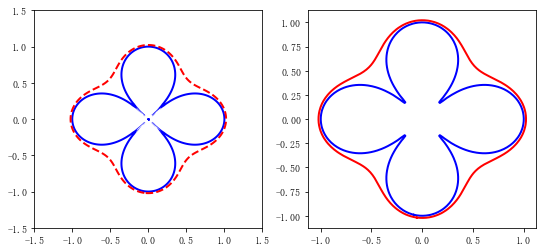

In [15]:
#%fig=使用相等線繪制隱函數曲線（左），取得相等線資料並繪圖（右）
y, x = np.ogrid[-1.5:1.5:200j, -1.5:1.5:200j]
f = (x**2 + y**2)**4 - (x**2 - y**2)**2

plt.figure(figsize=(9, 4))
plt.subplot(121)
extent = [np.min(x), np.max(x), np.min(y), np.max(y)]
cs = plt.contour(f, extent=extent, levels=[0, 0.1],    #❶
     colors=["b", "r"], linestyles=["solid", "dashed"], linewidths=[2, 2])

plt.subplot(122)
for c in cs.collections: #❷
    data = c.get_paths()[0].vertices
    plt.plot(data[:,0], data[:,1], 
        color=c.get_color()[0],  linewidth=c.get_linewidth()[0])

❶ 在呼叫 `contour()` 繪製相等線時，可以透過 `levels` 參數指定相等線所對應的函數值，這裡設定 `levels` 參數為 `[0, 0.1]` ，因此最後將繪製兩條相等線。透過 `colors`, `linestyles`, `linewidths` 等參數可以分別指定每條相等線的顏色、線型以及線寬。

仔細觀察圖 4-31(左) 會發現，表示隱函數 $f(x,y)=0$ 的藍色實線並不是完全連續的，在圖的中間部分它由許多孤立的小段組成。因為相等線的原點附近無限接近，所以無論對函數 $f$ 的設定值空間如何進行細分，總是會有無法分開的地方，最後造成了圖中的那些孤立的細小區域，而表示隱函數 $f(x,y)-0.1=0$ 的紅色虛線則是擊竹合且連續的。

❷ 從相等線集合 `cs` 中找到表示相等線的路徑，並使用 `plot()` 將其製出來，效果如圖4-31(右)所示。

`contour()` 傳回一個 `QuadContourSet` 物件，其 `collections` 屬性是一個相等線清單，每條相等線用一個 `LineCollection` 物件表示：

In [16]:
print(cs)
cs.collections

<a list of 2 mcoll.LineCollection objects>

每個 `LineCollection` 物件都有它自己的顏色、線型、線寬等屬性，注意這些屬性所獲得結果的外面還有一層包裝，要獲得其第 0 個元素才是真正的設定：

In [17]:
print(cs.collections[0].get_color()[0])
print(cs.collections[0].get_linewidth()[0])

[0. 0. 1. 1.]
2


在前面的章節介紹過 `LineCollection` 物件是一組曲線的集合，因此它可以表示藍色實線那樣由多條線組成的相等線。它的 `get_paths()` 方法獲得組成相等線的所有路徑，本例中藍色實線所表示的相等線由 42 條路徑組成：

In [18]:
len(cs.collections[0].get_paths())

42

路徑是一個 `Path` 物件，透過它的 `vertices` 屬性可以獲得路徑上所有點的座標：

In [19]:
path = cs.collections[0].get_paths()[0]
path.vertices

array([[-0.08291457, -0.98938936],
       [-0.09039269, -0.98743719],
       [-0.09798995, -0.98513674],
       ...,
       [-0.05276382, -0.99548781],
       [-0.0678392 , -0.99273907],
       [-0.08291457, -0.98938936]])

### 四邊形網格

`pcolormesh(X, Y, C)` 繪製由 `X`, `Y`, `C` 三個陣列定義的四邊形網格。這三個陣列是二維陣列，X 和 Y 的形狀相同， C 的形狀可以和 X, Y相同，也可以比它們少一行一列。每個四邊形的 4 個頂點的 X 軸座標由 X 中上下左右相鄰的 4 個元素決定，Y 軸座標由 Y 中對應的 4 個元素決定。四邊形的顏色由 `C` 中對應的元素以及顏色對映表決定。

在下面的實例中，X 和 Y 的形狀都是 `(2,3)` ，其中有兩組上下左右相鄰的 4 個元素，定義兩個四邊形的 4 個頂點：
```
第一個四邊形的頂點      第二個四邊形的頂點
================      =================
(0, 0), (1, 0.2)      (1, 0.2), (2, 0)
(0, 1), (1, 0.8)      (1, 0.8), (2, 1)
```
每個四邊形的填充顏色與 Z 中的元素對應：

In [20]:
X = np.array([[0, 1, 2], 
              [0, 1, 2]])
Y = np.array([[0, 0.2, 0],
              [1, 0.8, 1]])
Z = np.array([[0.5, 0.8]])

下面將 X 和 Y 平坦化之後用 `plot()` 繪製出這些頂點的座標，然後呼叫 `pcolormesh()` 繪製這兩個四邊形。與左邊的四邊形對應的顏色對映值為0.5，與右邊的四邊形對應的顏色對映值為 0.8，因此一個顯示為藍色，另一個顯示為紅色。

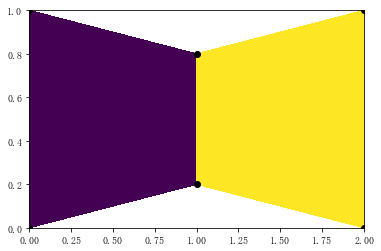

In [21]:
#%fig=示範pcolormesh()繪制的四邊形以及其填充彩色
plt.plot(X.ravel(), Y.ravel(), "ko")
plt.pcolormesh(X, Y, Z)
plt.margins(0.1);

在下面的實例中，使用 `pcolormesh()` 繪製複數平面上的座標轉換。圖4-33 中，左側的圖表顯示 s 平面上的矩形區域，右側的圖表顯示透過公式 $z=\frac{2+s}{2-s}$ 座標轉換之後的網格，左側中的矩形被轉換成右側同顏色的四邊形。由於 `axes[2]` 和 `axes[3]` 中的網格由近 4 萬個四邊形組成，為了在輸出 SVG 影像時加強繪圖速度，這裡將 `rasterized` 參數設定為 True，這些四邊形將作為一幅點陣影像輸出到 SVG 影像中。

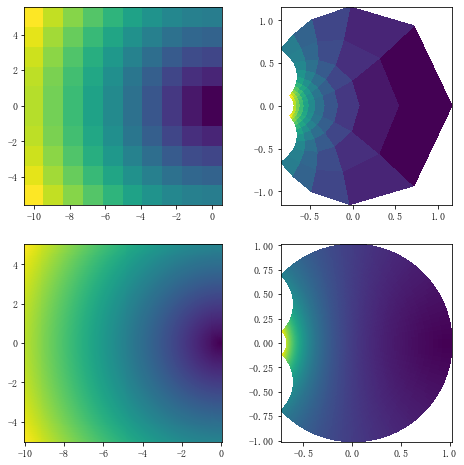

In [22]:
#%fig=使用pcolormesh()繪制復數平面上的座標變換
def make_mesh(n):
    x, y = np.mgrid[-10:0:n*1j, -5:5:n*1j]

    s = x + 1j*y
    z = (2 + s) / (2 - s)
    return s, z

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
for ax in axes:
    ax.set_aspect("equal")
    
s1, z1 = make_mesh(10)
s2, z2 = make_mesh(200)
axes[0].pcolormesh(s1.real, s1.imag, np.abs(s1), shading='auto')
axes[1].pcolormesh(z1.real, z1.imag, np.abs(s1), shading='auto')
axes[2].pcolormesh(s2.real, s2.imag, np.abs(s2), rasterized=True, shading='auto')
axes[3].pcolormesh(z2.real, z2.imag, np.abs(s2), rasterized=True, shading='auto');

還可以在極座標中使用 `pcolormesh()` 繪製網格，下面的實例使用 `mgrid[]` 建立極座標中的等間隔網格，然後在 `projection` 為 `polar` 的子圖中繪製這個網格：

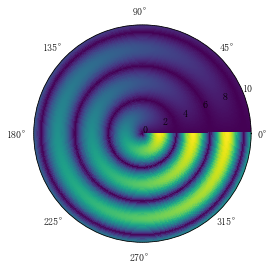

In [23]:
#%fig=使用pcolormesh()繪制極座標中的網格
def func(theta, r):
    y = theta * np.sin(r)
    return np.sqrt(y*y)

T, R = np.mgrid[0:2*np.pi:360j, 0:10:100j]
Z = func(T, R)

ax=plt.subplot(111, projection="polar", aspect=1.)
ax.pcolormesh(T, R, Z, rasterized=True, shading='auto');

### 三角網格

在工業工程設計與分析中，經常將分析物件使用三角網格離散化，然後用有限元法進行模擬。在 matplotlib 中提供了下面的三角網格繪製函數：
- `triplot()` ：繪製三角網格的邊線。
- `tripcolor()` ：與 `pcolormesh()` 類似，繪製填充顏色的三角網格。
- `tricontour()` 和 `tricontourf()` ：繪製三角網格的等高線。

diffusion.txt 是使用 FiPy 對二維穩態熱傳導問題進行有限元模擬的結果。該檔案分為三個部分：
- 以 `#points` 開頭的部分是一個形狀為 `(N_points, 2)` 的陣列，儲存 `N_points` 個點的座標。
- 以 `#triangles` 開頭的部分是一個形狀為 `(N_triangles, 3)` 的陣列，儲存每個三角形三個頂點在 `points` 陣列中的索引。
- 以 `#values` 開頭的部分是一個形狀為 `(N_triangles, 1)` 的陣列，儲存每個三角形對應的溫度。

下面的程式將這些資料讀取 `data` 字典：

In [24]:
with open("diffusion.txt") as f:
    data = {"points":[], "triangles":[], "values":[]}
    values = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith("#"):
            values = data[line[1:]]
            continue
        values.append([float(s) for s in line.split()])
        
data = {key:np.array(data[key]) for key in data}

然後就可以呼叫 `trip*()` ，用三角形網格顯示目的地區域的溫度，結果如圖 4-35 所示。
- ❶ `tripcolor()` 的參數從左到右分別為各點的 X 軸座標、Y 軸座標、三角形頂點索引、純量陣列。純量陣列中的每個值可以與每個頂點對應，也可以與每個三角形對應。在本例中由於 `values` 的長度與 `triangles` 的第 0 軸長度相同，因此每個值與三角形相對應。若純量陣列的長度與頂點數相同，則每個三角形對應的值由其三個頂點的平均值決定。
- ❷ 呼叫 `triplot()` 繪製所有三角形的邊線。
- ❸ 呼叫 `tricontour()` 繪製等高線。由於要求純量陣列與三角形頂點相對應，而本例中純量陣列與三角形對應，因此先計算每個三角形的重心座標 Xc 和 Yc ，這樣 `values` 中的每個值就可以與每個三角形的重心對應。在呼叫 `tricontour()` 時沒有傳遞三角形頂點索引資訊，這時會呼叫 matplotlib 附帶的三角化演算法計算出每個三角形對應的頂點。

In [25]:
#%hide
# %matplotlib_png

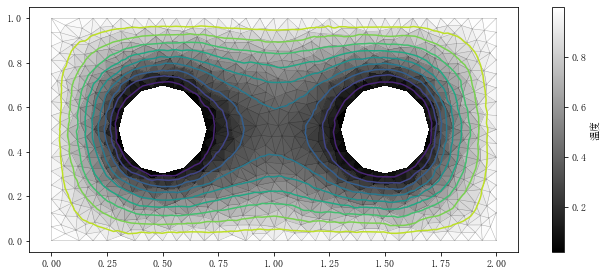

In [26]:
#%fig=使用tripcolor()和tricontour()繪制三角網格和相等線
X, Y = data["points"].T
triangles = data["triangles"].astype(int)
values = data["values"].squeeze()

fig, ax = plt.subplots(figsize=(12, 4.5))
ax.set_aspect("equal")

mapper = ax.tripcolor(X, Y, triangles, values, cmap="gray") #❶
plt.colorbar(mapper, label=u"溫度")

plt.triplot(X, Y, triangles, lw=0.5, alpha=0.3, color="k") #❷

Xc = X[triangles].mean(axis=1)
Yc = Y[triangles].mean(axis=1)
plt.tricontour(Xc, Yc, values, 10) #❸;

In [27]:
#%hide
%matplotlib_svg

UsageError: Line magic function `%matplotlib_svg` not found.


### 箭頭圖

使用 `quiver()` 可以用大量的箭頭表示向量場。下面的程式顯示 $f(x, y)=xe^{x^2-y^2} $ 的梯度場，結果如圖4-36所示。 `vec_field(f, x, y)` 近似計算函數 f 在 x 和 y 處的偏導數。

`quiver()` 的前 5 個參數中，X, Y 是箭頭起點的 X 軸和 Y 軸座標，U, V 是箭頭方向和大小的向量，C 是箭頭對應的值。

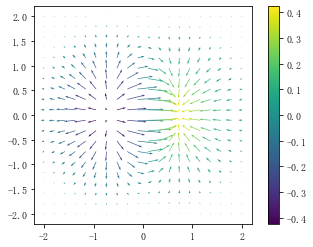

In [28]:
#%fig=用quiver()繪制向量場
def f(x, y):
    return x * np.exp(- x**2 - y**2)

def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy 
    return vx, vy
    
X, Y = np.mgrid[-2:2:20j, -2:2:20j]
C = f(X, Y)
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar();
plt.gca().set_aspect("equal")

此外，`quiver()` 還提供許多參數來設定箭頭的大小和方向：
- 箭頭的長度由 `scale` 和 `scale_units` 決定。其中 `scale` 為數值，表示箭頭的縮放尺度，而 `scale_units` 為箭頭的長度單位，可選單位有 `width`, `height`, `dots`, `inches`, `x`, `y`, `xy`等。其中 `width`, `height` 為子圖的寬和高，`dots`, `inches` 以點和英吋為單位，`x`, `y`, `xy` 則以資料座標系的 X 軸、Y 軸或單位矩形的對角線為單位。箭頭的長度按照「UV向量的長度 * 箭頭的長度單位 / 縮放尺度」計算。舉例來說，如果 `scale` 為 2，`scale_units` 為 `x`，而 UV 向量的長度為 3，則對應的箭頭的長度為 1.5 個 X 軸的單位長度。
- `width`, `headwidth`, `headlength`, `headaxislength` 等參數決定箭頭的桿部分粗細、箭表頭分的大小以及長度，而 `units` 參數決定這些參數的單位，可選值與 `scale_units` 相同。這些參數的含義如圖4-37所示：

![4-37](quiver.png)

圖4-37 quiver箭頭的各個參數的含義

- `pivot` 參數決定箭頭旋轉的中心，可以為 'tail', 'middle', 'tip' 相等，在圖 4-37 中使用灰色小數點表示這些旋轉點。
- `angles` 參數決定箭頭的方向。正方形可能由於 X 軸和 Y 軸的縮放尺度不同而顯示為長方形，因此方向有兩種計算方式：'uv'和'xy'。其中'uv'只採用 U 和 V的值計算方向，因此若 U 和 V 的值相同，則方向為 45 度；而 'xy' 在使用 U 和 V 計算角度時考慮 X 軸和 Y 軸的縮放尺度。

下面透過兩個實例幫助讀者了解這些參數的用法，如圖4-38 所示。首先繪製了一條參數曲線，然後沿著該曲線繪製了 40 個等距曲線的箭頭，箭頭的方向表示箭頭處曲線的切線方向，顏色表示箭頭所在處參數的大小。計算部分留給讀者自行分析，下面仔細分析這些參數是如何決定箭頭的大小和方向的。

箭頭的長度和其他尺寸的單位由 `scale_units` 和 `units` 決定，在本例中均為 'dots'，即以像素點為單位。dx 和 dy 為描述箭頭的向量，長度為 1，將 `scale` 參數設定為 1.0/arrow_size，這樣所有箭頭的長度均為 `arrow_size` 個像素點。箭桿的寬度由 `width` 參數指定，本例中的寬度為 1 個像素。而 `headwidth`, `headlength` 和 `headaxislength` 等參數決定箭表頭分的寬度、長度以及箭頭與箭桿接觸部分的長度，這些參數為對應長度與箭桿寬度的比例係數。在本例中，由於箭桿寬度為 1 個像素，因此箭頭寬度為 arrow_size*0.5 個像素，而箭表頭分的長度和箭頭的長度相同，因此圖中的箭頭沒有箭桿部分。

由於子圖的 X 軸和 Y 軸的縮放比例不同，因此設定 `angles` 參數為 'xy' ，這樣箭頭的方向才能與曲線的切線方向相同。

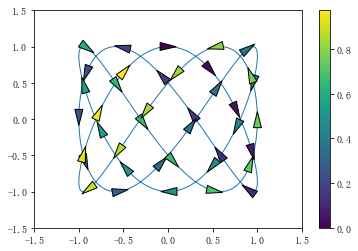

In [29]:
#%fig=使用箭頭表示參數曲線的切線方向
n = 40
arrow_size = 16
t = np.linspace(0, 1, 1000)
x = np.sin(3*2*np.pi*t)
y = np.cos(5*2*np.pi*t)
line, = plt.plot(x, y, lw=1)

lengths = np.cumsum(np.hypot(np.diff(x), np.diff(y)))
length = lengths[-1]
arrow_locations = np.linspace(0, length, n, endpoint=False)
index = np.searchsorted(lengths, arrow_locations)
dx = x[index + 1] - x[index]
dy = y[index + 1] - y[index]
ds = np.hypot(dx, dy)
dx /= ds
dy /= ds
plt.quiver(x[index], y[index], dx, dy, t[index],
          units="dots", scale_units="dots", 
          angles="xy", scale=1.0/arrow_size, pivot="middle",
          edgecolors="black", linewidths=1,
          width=1, headwidth=arrow_size*0.5, 
          headlength=arrow_size, headaxislength=arrow_size, 
          zorder=100)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5]);

還可以用 `quiver()` 繪製起點和終點的箭頭集合。下面的實例繪製神經網路結構示意圖，效果如圖4-39所示。為了讓箭頭能夠連接兩個神經節點，將 `scale_units` 設定為 "xy" ，將 `angles` 設定為 "xy" ，並且將 `scale` 設定為 1。這樣箭頭的長度就為箭頭對應的向量在資料空間中的長度。

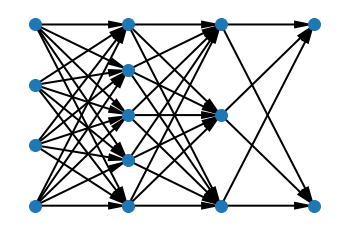

In [30]:
#%fig=使用quiver()繪制神經網路結構示意圖
levels = [4, 5, 3, 2]
x = np.linspace(0, 1, len(levels))

for i in range(len(levels) - 1):
    j = i + 1
    n1, n2 = levels[i], levels[j]
    y1, y2 = np.mgrid[0:1:n1*1j, 0:1:n2*1j]
    x1 = np.full_like(y1, x[i])
    x2 = np.full_like(y2, x[j])
    plt.quiver(x1, y1, x2-x1, y2-y1, 
              angles="xy", units="dots", scale_units="xy", 
              scale=1, width=2, headlength=10,
              headaxislength=10, headwidth=4)
    
yp = np.concatenate([np.linspace(0, 1, n) for n in levels])
xp = np.repeat(x, levels)
plt.plot(xp, yp, "o", ms=12)
plt.gca().axis("off")
plt.margins(0.1, 0.1);

### 3D繪圖

`mpl_toolkits.mplot3d` 模組在 matplotlib 的基礎上提供了 3D 作圖的功能。由於它使用 matplotlib 的二維繪圖功能實現 3D 圖形的繪製工作，因此繪圖速度有限，不適合用於大規模資料的 3D 繪圖。如果需要更複雜的 3D 資料視覺化功能，請閱讀 TVTK 與 Mayavi 章節。

下面是繪製 3D 曲面的程式，程式的輸出如圖4-40所示。

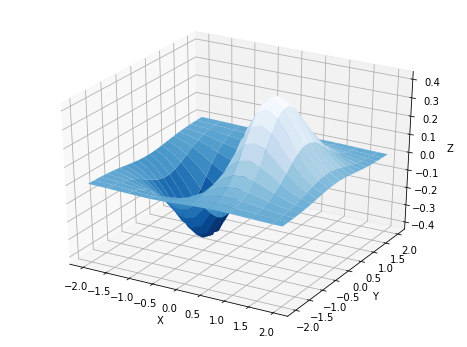

In [78]:
#%fig=使用mplot3D繪制的3D曲面圖
import mpl_toolkits.mplot3d #❶

x, y = np.mgrid[-2:2:20j, -2:2:20j] #❷
z = x * np.exp( - x**2 - y**2)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d') #❸
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap = plt.cm.Blues_r) #❹
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

- ❶ 首先載入 `mplot3d` 模組，matplotlib 中 3D 繪圖相關的功能均在此模組中定義。
- ❷ 使用 `mgrid` 建立 X-Y 平面的網格並計算網格上每點的高度 z。由於繪製 3D 曲面的函數要求其 X, Y, Z 軸的資料都用相同形狀的二維陣列表示，因此這裡不能使用 `ogrid` 建立。和之前的 `imshow()` 不同，陣列的第 0 軸可以表示 X 和 Y 軸中的任意一個，在本例中第 0 軸表示 X 軸，第 1 軸表示 Y 軸。
- ❸ 在目前圖表中建立一個子圖，透過 `projectoin` 參數指定子圖的投影模式為 "3d" ，這樣 `subplot()` 將傳回一個用於 3D 繪圖的 `Axes3D` 子圖物件。
> `投影模式`
> 投影模式決定了點從資料座標轉為螢幕座標的方式。可以透過下面的敘述獲得目前有效的投影模式的名稱：
> ```
> >>> from matplotlib import projections
> >>> projections.get_projection.names()
> ['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']
> ```
> 只有在載入 `mplot3d` 模組之後此清單才會出現 '3d' 投影模式。'aitoff', 'hammer', 'lambert', 'mollweidt' 等均為地圖投影，`polar` 為極座標投影，`rectilinear` 則是預設的直線投影模式。

- ❹ 呼叫 `Axes3D` 物件的 `plot_surface()` 繪製立體曲面圖。其中參數 x, y, z 都是形狀為 (20, 20) 的二維陣列。陣列 x 和 y 組成了 X-Y 平面上的網格，而陣列 z 則是網格上各點的曲面上的設定值。透過 `cmap` 參數指定值和顏色之間的對映，即曲面上各點的高度值與其顏色的對應關係。`rstride` 和 `cstride` 參數分別是陣列的第 0 軸和第 1 軸的索引間隔。對於很大的陣列，使用較大的間隔可以加強曲面的繪製速度。

除了繪製 3D 曲面之外，`Axes3D` 物件還提供了許多其他的 3D 繪圖方法。請參考官網檢視各種 3D 繪圖的示範程式。